In [1]:
%matplotlib
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
#import dsv.uebung.dsv1 as dsv1
import functions.dsvorg as do
from IPython.display import Audio
import functions.dac as dac
import functions.bsfilter as bsfilter
#import dsv.classes.signal as sig

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Demonstrationen zu Abtastung und Rekonstruktion

#### Zeitfunktionen zu einer Abtastwertefolge
Eine Sinusschwingung der Frequenz 1 Hz wird mit einer Frequenz von 6 Hz abgetastet. Die entstehenden Abtastwerte könnten jedoch auch zu anderen Schwingungen (höherer positiver bzw. negativer Frequenzen) gehören.

In der folgenden Zelle wird eine passende zufällige Frequenz zwischen -23 Hz und 25 Hz angezeigt.

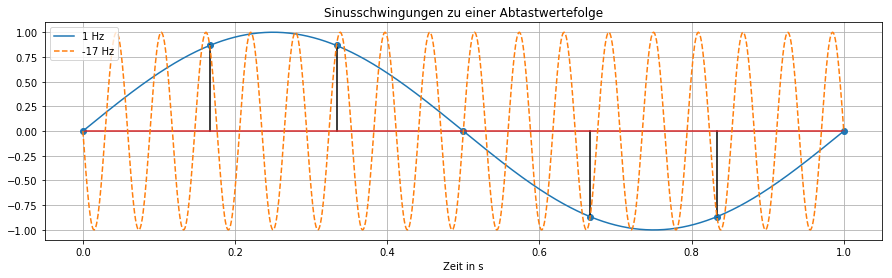

In [2]:
do.demo_aliasing()

#### Demonstration von Aliasingfehlern
Ein akustisches Signal (Mischung von Tönen 1 kHz  und 4 kHz) soll  mit 10 kHz und  mit 6 kHz abgetastet werden. Ändern Sie den Parameter (fS) entsprechend. Welche Frequenzen sind zu hören?

#### <font color="#FF0000">Eingabezelle</font>

In [7]:
fS = 6000

In [8]:
sig1 = do.generate_signal(1000,fS)
sig2 = do.generate_signal(4000,fS)
sig_sum = sig1 + sig2
Audio(data = sig_sum, rate = fS)

#### Analoge harmonische Schwingungen im Zeit- und Frequenzbereich
In der folgenden Zelle können Sie ein Signal aus 1 bis 3 Harmonischen (Basisfrequenz und ganzzahlige Vielfache) kombinieren und anschließend im Zeit- und Frequenzbereich darstellen. Der dargestellte Frequenzbereich kann bis 1024 Hz umfassen.

In [ ]:
f1 = 4
f2 = 8
f3 = 128
fmax = 512   #maximal dargestellte Frequenz

In [ ]:
y = dac.analog_t(f1=f1, f2=f2, f3=f3)
dac.analog_f(y, fmax=fmax)

#### Digitale harmonische Schwingungen im Zeit- und Frequenzbereich
Das gerade erzeugte Signal wird mit der Frequenz `fS` abgetastet.

#### <font color="#FF0000">Eingabezelle</font>

In [ ]:
fS = 512

In [ ]:
y_d = dac.digital_t(f1=f1, f2=f2, f3=f3, fS=fS)
if len(y_d) > 1:
    dac.digital_f(y_d, fmax=fmax)

#### Zeitsignal aus der Beschreibung im Frequenzbereich generieren
In der folgenden Zelle können Sie ein kontinuierliches Signal aus maximal 3 Spektralkoeffizienten `fx = [amplitude, frequenz]` erzeugen. Desweiteren können Sie testen, wie durch die Einbeziehung der Spiegelspektren ein abgetastetes Signal im Zeitbereich entsteht. Für dieses Experiment ist die Abtastfrequenz mit 16 Hz festgelegt.

#### <font color="#FF0000">Eingabezelle</font>

In [ ]:
f1 = [0.5, 1]
f2 = [0.3, 2]
f3 = [1,4]
anz_spek = 100

In [ ]:
dac.generate_analog_sig(f1=f1, f2=f2, f3=f3)
dac.generate_dig_sig(f1=f1, f2=f2, f3=f3, anz_spek=anz_spek)

#### Sample & Hold
In der folgenden Zelle wird das Verfahren veranschaulicht. Dazu wird ein Gemisch aus drei Harmonischen erzeugt und dargestellt. Weiterhin wird die Abtastwertefolge und das Sample & Hold Signal dargestellt. Dazu werden 1024 Werte betrachtet. Das entspricht einer Zeit von 1 s.

#### <font color="#FF0000">Eingabezelle</font>

In [ ]:
f1 = 8
f2 = 0
f3 = 0
fS = 64

In [ ]:
data = dac.analog_sig(f1=f1, f2=f2, f3=f3)
dac.sample_hold(data, fS=fS)

Der durch das Sample & Hold Verfahren bedingte Effekt soll jetzt hörbar gemacht werden. Dazu wird ein Signalgemisch durch Addition zweier Harmonischer (mit `f1`und `f2`) erzeugt. Aus diesem wird ein Sample & Hold Signal erzeugt, indem ein Abtastwert `16000/fS` Werte gehalten wird. (Zulässige Werte für `fS` sind: `16000, 8000, 4000, 2000, 1000, 500`).
Die durch das Verfahren entstehenden hohen Frequenzen werden durch Tiefpassfilterung entfernt.

#### <font color="#FF0000">Eingabezelle</font>

In [ ]:
f1 = 400
f2 = 1800
fS = 4000

In [ ]:
data1 = do.generate_signal(f1)
data2 = do.sys2(data1, f2)
data3 = dac.sample_hold_audio(data2,fS=fS)

In [ ]:
data3_filt = bsfilter.filter_appl(16000, data3, fgu=0, fgo=fS/2, order=10, typ='lp')
y = np.fft.fft(data3_filt)/len(data3_filt)
y1 = np.abs(np.fft.fftshift(y))
f = np.linspace(-8000,7999,16000)
plt.axis([-fS/2,fS/2,0,1])
plt.grid(True)
plt.title('Spektrum des Sample & Hold Signals')
plt.plot(f,y1)
plt.show()

In [ ]:
audio = np.append(data2, data3_filt)
Audio(data = audio, rate = 16000)

####  Ideale Rekonstruktion
In der folgenden Zelle können Sie die ideale Rekonstruktion testen. Für einen Zeitabschnitt von 3 Sekunden können Sie ein kontinuierliches Signal aus maximal 3 Frequenzkomponenten erstellen (Originalsignal). Dieses wird mit einer wählbaren Frequenz (Zweierpotenz) abgetastet und anschließend rekonstruiert.

#### <font color="#FF0000">Eingabezelle</font>

In [ ]:
f1 = 5
f2 = 0
f3 = 0
fS = 32

In [ ]:
dac.analog_reko(f1=f1, f2=f2, f3=f3,fS=fS)